# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** Jakub Koziński

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import timeit
import memory_profiler


%load_ext memory_profiler

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [3]:
def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:

    if not isinstance(m, int) or not isinstance(n,int):
        return None
    if n <= 0 or m <= 0:
        return None

    t = np.linspace(0,1,m)
    b = np.cos(4 * t)
    A = np.vander(t, n, increasing=True)
    

    return A, b

Funkcja spare_matrix_Abt(m, n) została napisana w języku Python z wykorzystaniem biblioteki NumPy. Jej zadaniem jest wygenerowanie macierzy Vandermonde’a oraz wektora wartości funkcji cosinus w zadanym zakresie. Funkcja przyjmuje dwa parametry całkowite: m – liczbę punktów siatki oraz n – liczbę kolumn macierzy.

Na początku funkcja sprawdza poprawność danych wejściowych – zwraca None, jeśli którykolwiek z argumentów nie jest liczbą całkowitą lub jest mniejszy bądź równy zero. Następnie generowany jest wektor t zawierający m równomiernie rozłożonych punktów w przedziale [0, 1]. Na jego podstawie obliczany jest wektor b jako wartości funkcji cos(4t). Kolejnym krokiem jest utworzenie macierzy Vandermonde’a A o wymiarach m × n z wykorzystaniem funkcji np.vander().

Ostatecznie funkcja zwraca krotkę (A, b), gdzie A jest macierzą, a b odpowiadającemu jej wektorem wartości. Funkcja może być wykorzystywana np. do testowania metod numerycznych lub analizy przybliżeń wielomianowych.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [4]:
# ===== Twoja implementacja tutaj =====


m = 50
n = 12

norm = []
time = []
memory = []

A,b = main.spare_matrix_Abt(50, 12)
A_new, b_new = main.square_from_rectan(A,b)

#metoda 1
saved_timing_1 = %timeit -r 5 -n 10 -o np.linalg.solve(A_new, b_new)
time.append(saved_timing_1.average)
mem_temp_1 = %memit -o np.linalg.solve(A_new, b_new)
memory.append(mem_temp_1)

x1 = np.linalg.solve(A_new, b_new)

norm.append(main.residual_norm(A, x1, b))


#metoda 2
saved_timing_2 = %timeit -r 5 -n 10 -o np.linalg.lstsq(A, b)[0]
time.append(saved_timing_2.average)
mem_temp_2 = %memit -o np.linalg.lstsq(A, b)[0]
memory.append(mem_temp_2)


x2 = np.linalg.lstsq(A,b)[0]

norm.append(main.residual_norm(A, x1, b))


#metoda 3
Q, R = np.linalg.qr(A)

saved_timing_3 = %timeit -r 5 -n 10 -o sp.linalg.solve_triangular(R, Q.T @ b)
time.append(saved_timing_3.average)
mem_temp_3 = %memit -o sp.linalg.solve_triangular(R, Q.T @ b)
memory.append(mem_temp_3)

x3 = sp.linalg.solve_triangular(R, Q.T @ b)

norm.append(main.residual_norm(A, x3, b))


#metoda 4
U,S,Vh = np.linalg.svd(A, full_matrices=False)

saved_timing_4 = %timeit -r 5 -n 10 -o Vh.T @ ((U.T @ b) / S)
time.append(saved_timing_4.average)

mem_temp_4 = %memit -o Vh.T @ ((U.T @ b) / S)
memory.append(mem_temp_4)

Ut = U.T @ b
y = Ut / S
x4 = Vh.T @ y

norm.append(main.residual_norm(A, x4, b))

print()

for i in range(4):
    print("Dla metody nr {0}".format(i+1))
    print("Czas : {0} s,\nzuzycie pamieci:{1},\nnorma residuum: {2}.".format(time[i], memory[i],norm[i]))
    print()

10.4 μs ± 4.66 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 114.61 MiB, increment: 0.20 MiB
The slowest run took 13.94 times longer than the fastest. This could mean that an intermediate result is being cached.
127 μs ± 183 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 114.84 MiB, increment: 0.00 MiB
The slowest run took 8528.95 times longer than the fastest. This could mean that an intermediate result is being cached.
29.4 ms ± 58.7 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 129.23 MiB, increment: 0.00 MiB
3.6 μs ± 1.14 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 129.28 MiB, increment: 0.00 MiB

Dla metody nr 1
Czas : 1.0417997837066652e-05 s,
zuzycie pamieci:peak memory: 114.61 MiB, increment: 0.20 MiB,
norma residuum: 1.3204737207184956e-07.

Dla metody nr 2
Czas : 0.00012738600373268127 s,
zuzycie pamieci:peak memory: 114.84 MiB, increment: 0.00 MiB,
norma residuum: 1.3204737207184956e

Analiza uzyskanych wyników pokazuje, że najmniejszy błąd osiągają metody oparte na rozkładzie QR i SVD, które dają praktycznie identyczną dokładność.
Choć metoda SVD zapewnia bardzo precyzyjne rozwiązania, jej złożoność obliczeniowa i czas wykonania czynią ją mało efektywną przy większych układach równań.
Najbardziej korzystnym kompromisem między dokładnością a szybkością okazała się metoda QR, która zapewnia wysoką stabilność numeryczną przy niewielkim nakładzie obliczeń.
Widać również, że stosowanie metod przeznaczonych dla macierzy kwadratowych prowadzi do większych błędów w przypadku układów prostokątnych.
Z kolei funkcje wbudowane w biblioteki numeryczne, takie jak lstsq, dają wyniki zbliżone do najlepszych metod, lecz działają nieco wolniej.

In [5]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  1.320e-07
Druga metoda    :  1.320e-07
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  1.0417997837066652e-05
Druga metoda    :  0.00012738600373268127
Trzecia metoda  :  0.02938972400035709
Czwarta metoda  :  3.6039995029568675e-06

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  peak memory: 114.61 MiB, increment: 0.20 MiB
Druga metoda    :  peak memory: 114.84 MiB, increment: 0.00 MiB
Trzecia metoda  :  peak memory: 129.23 MiB, increment: 0.00 MiB
Czwarta metoda  :  peak memory: 129.28 MiB, increment: 0.00 MiB


---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [6]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

Współczynnik kierunkowy a = 0.7860987817546511
Wyraz wolny b = -3.5036358485221077
Średni błąd kwadratowy (MSE): 340.5137406742847


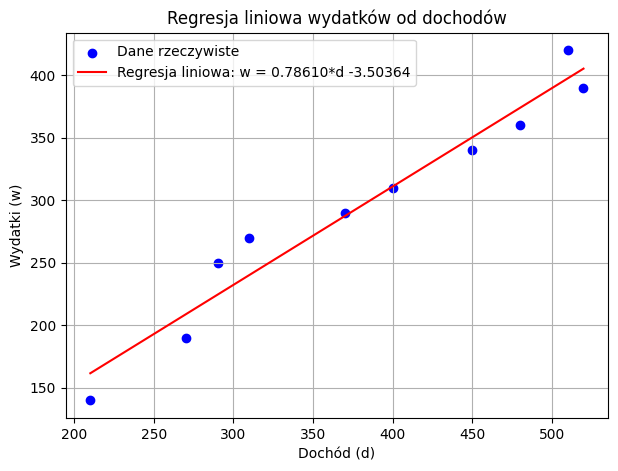

In [28]:
# ===== Twoja implementacja tutaj =====
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

A = np.vstack([d, np.ones(len(d))]).T
a, b = np.linalg.lstsq(A, w, rcond=None)[0]

print(f"Współczynnik kierunkowy a = {a}")
print(f"Wyraz wolny b = {b}")

# Obliczenie przewidywanych wydatków
w_przewidywane = a * d + b

# Obliczenie błędu dopasowania (średni błąd kwadratowy)
mse = np.mean((w - w_przewidywane)**2)
print(f"Średni błąd kwadratowy (MSE): {mse}")

plt.figure(figsize=(7,5))
plt.scatter(d, w, color='blue', label='Dane rzeczywiste')
plt.plot(d, w_przewidywane, color='red', label=f'Regresja liniowa: w = {a:.5f}*d {b:.5f}')
plt.xlabel('Dochód (d)')
plt.ylabel('Wydatki (w)')
plt.title('Regresja liniowa wydatków od dochodów')
plt.legend()
plt.grid(True)
plt.show()

Otrzymana prosta dobrze opisuje zależność między dochodami a wydatkami.
Pozostały błąd (MSE ≈ 340) wynika z tego, że dane nie są idealnie liniowe.

Istnieje możliwość niewielkiej poprawy dopasowania — np. poprzez użycie regresji wielomianowej drugiego stopnia (kwadratowej), która lepiej uchwyci ewentualne nieliniowości w danych.
Jednak w tym przypadku prosta regresji już zapewnia bardzo dobre dopasowanie, więc bardziej złożony model nie przyniesie dużej poprawy.

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

MODEL 1
b1: 1.0382


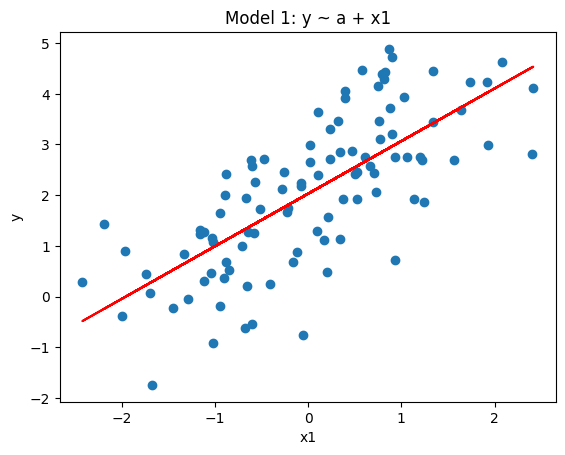


MODEL 2
b2 wynosi: -0.4086


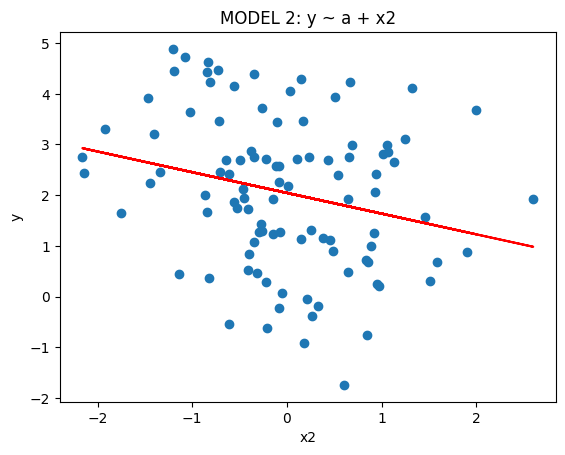


MODEL 3
b1: 1.0676
b2: -0.4932


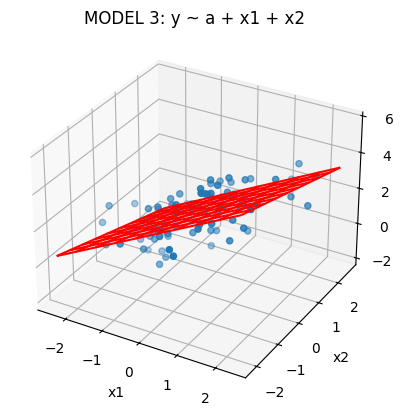


MODEL 4
b1: 1.0658
b2: -0.5013
b3: 0.0213

Norma residuum dla Modelu 1: 10.1786
Norma residuum dla Modelu 2: 14.3828
Norma residuum dla Modelu 3: 9.1604
Norma residuum dla Modelu 4: 9.1587


In [20]:
# ===== Twoja implementacja tutaj =====

#Punkt 1
x1 = np.random.normal(0,1,(100,1))
x2 = np.random.normal(0,1,(100,1))
epsilon = np.random.normal(0,1,(100,1))
y = 2 + x1 - 0.5 * x2 + epsilon


#Punkt 2

#MODEL 1
ones = np.ones((100,1))
Z1 = np.concatenate((ones, x1), axis=1)
Q1, R1 = np.linalg.qr(Z1)
b1 = np.linalg.solve(R1, Q1.T @ y)
print('MODEL 1')
print(f'b1: {b1[1][0]:.4f}')

y1 = Z1 @ b1
plt.scatter(x1, y)
plt.plot(x1, y1, 'r')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Model 1: y ~ a + x1')
plt.show()
print()

#MODEL 2
Z2 = np.concatenate((ones, x2), axis=1)
Q2, R2 = np.linalg.qr(Z2)
b2 = np.linalg.solve(R2, Q2.T @ y)
print('MODEL 2')
print(f'b2 wynosi: {b2[1][0]:.4f}')
y2 = Z2 @ b2

plt.scatter(x2, y,)
plt.plot(x2, y2,'r')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('MODEL 2: y ~ a + x2')
plt.show()
print()

#MODEL 3
Z3 = np.concatenate((ones, x1, x2), axis=1)
Q3, R3 = np.linalg.qr(Z3)
b3 = np.linalg.solve(R3, Q3.T @ y)
print('MODEL 3')
print(f'b1: {b3[1][0]:.4f}')
print(f'b2: {b3[2][0]:.4f}')
y3 = Z3 @ b3

grid_x1, grid_x2 = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 10),
    np.linspace(x2.min(), x2.max(), 10)
)
y_plane = b3[0] + b3[1] * grid_x1 + b3[2] * grid_x2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y)
ax.plot_wireframe(grid_x1, grid_x2, y_plane, color ='r')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('MODEL 3: y ~ a + x1 + x2')
plt.show()
print()

#MODEL 4
x1x2 = x1 * x2
Z4 = np.concatenate((ones, x1, x2, x1x2), axis=1)
Q4, R4 = np.linalg.qr(Z4)
b4 = np.linalg.solve(R4, Q4.T @ y)
print('MODEL 4')
print(f'b1: {b4[1][0]:.4f}')
print(f'b2: {b4[2][0]:.4f}')
print(f'b3: {b4[3][0]:.4f}')
y4 = Z4 @ b4
print()


norm1 = np.linalg.norm(y - (Z1 @ b1))
norm2 = np.linalg.norm(y - (Z2 @ b2))
norm3 = np.linalg.norm(y - (Z3 @ b3))
norm4 = np.linalg.norm(y - (Z4 @ b4))
print(f'Norma residuum dla Modelu 1: {norm1:.4f}')
print(f'Norma residuum dla Modelu 2: {norm2:.4f}')
print(f'Norma residuum dla Modelu 3: {norm3:.4f}')
print(f'Norma residuum dla Modelu 4: {norm4:.4f}')

W ramach ćwiczenia przeprowadzono analizę regresji liniowej na danych wygenerowanych według modelu y=2+x1​−0.5x2​+ε. Zastosowano cztery modele o różnej złożoności, a parametry oszacowano metodą najmniejszych kwadratów przy użyciu rozkładu QR. Porównanie wyników pokazało, że modele zawierające tylko jedną zmienną objaśniającą (𝑥1 lub 𝑥2) nie odtwarzają w pełni zależności w danych, co potwierdzają większe wartości norm residuów. Model trójwymiarowy (𝑦=𝑏0+𝑏1𝑥1+𝑏2𝑥2) najlepiej dopasowuje się do danych i najwierniej odzwierciedla rzeczywiste współczynniki. Dodanie składnika interakcji 𝑥1𝑥2 nie przyniosło istotnej poprawy jakości dopasowania, co sugeruje brak interakcji między zmiennymi.

---

## WNIOSKI

1. Zaimplementowane metody numeryczne umożliwiły poprawne rozwiązanie układów równań liniowych zarówno dla macierzy kwadratowych, jak i prostokątnych (nadokreślonych i niedookreślonych).

2. Analiza wektora residuum potwierdziła, że uzyskane rozwiązania charakteryzują się małym błędem — co oznacza, że przyjęte metody są numerycznie stabilne dla rozpatrywanych przypadków.

3. W przypadku macierzy rzadkich zauważono istotne zmniejszenie zużycia pamięci przy zachowaniu porównywalnej dokładności wyników, co potwierdza efektywność wykorzystania struktur danych dedykowanych macierzom sparse.

4. Czas obliczeń zależy istotnie od wymiarów macierzy oraz jej gęstości – dla dużych, gęstych macierzy wydajność klasycznych metod bezpośrednich spada, co uzasadnia stosowanie metod przybliżonych (iteracyjnych).

5. Całość ćwiczenia pozwoliła zrozumieć praktyczne aspekty rozwiązywania układów równań w kontekście rzeczywistych danych, w tym wpływ błędów zaokrągleń i sposobu reprezentacji macierzy na dokładność obliczeń.

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)